## INTRODUCTION


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

In [118]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [119]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [96]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64

In [97]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
NaN    350
No     284
Name: count, dtype: int64

## Data Cleaning

In [98]:
yes_no = {"Yes": True, "No": False, True: True, False: False} # True and False keys ensure correct values aren't overwritten if cell is run more than once

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?",
    "Are you familiar with the Expanded Universe?",
    "Do you consider yourself to be a fan of the Star Trek franchise?"
    
    ]:
    star_wars[col] = star_wars[col].map(yes_no, na_action='ignore')

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64

In [99]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    True: True,
    False: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
    
star_wars.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [100]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.iloc[:,3:9].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [101]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_ep1",
        "Unnamed: 10": "ranking_ep2",
        "Unnamed: 11": "ranking_ep3",
        "Unnamed: 12": "ranking_ep4",
        "Unnamed: 13": "ranking_ep5",
        "Unnamed: 14": "ranking_ep6"
        })

star_wars.iloc[:,9:15].head()

,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


In [102]:
star_wars.dtypes

RespondentID                                                                                                        int64
Have you seen any of the 6 films in the Star Wars franchise?                                                         bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                              object
seen_1                                                                                                               bool
seen_2                                                                                                               bool
seen_3                                                                                                               bool
seen_4                                                                                                               bool
seen_5                                                                                                               bool
seen_6                  

In [121]:
# Renaming the rest of the columns for completeness's sake...
star_wars = star_wars.rename(columns={
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda'
})


## Analysis 1

In [104]:
mean_ranking = star_wars[star_wars.columns[9:15]].mean().sort_values()
mean_ranking

ranking_ep5    2.513158
ranking_ep6    3.047847
ranking_ep4    3.272727
ranking_ep1    3.732934
ranking_ep2    4.087321
ranking_ep3    4.341317
dtype: float64

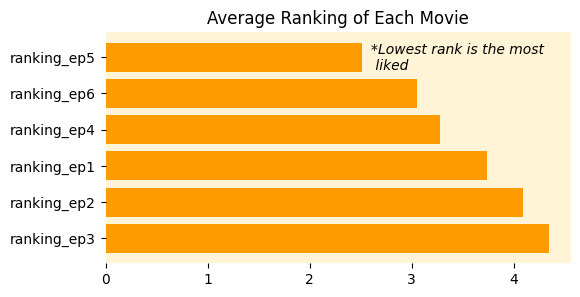

In [105]:
fig,ax = plt.subplots(figsize=(6,3))
rankings = ax.barh(mean_ranking.index, mean_ranking, color='#fe9b00')

ax.set_facecolor('#fff4d6')
ax.set_title('Average Ranking of Each Movie')
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
ax.invert_yaxis()
ax.text(2.6,0.35,'*Lowest rank is the most\n liked', fontstyle='italic')

plt.show()

In [106]:
total_seen = star_wars[star_wars.columns[3:9]].sum()
total_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

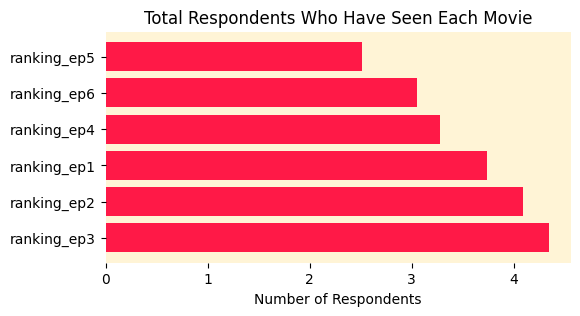

In [107]:
fig,ax = plt.subplots(figsize=(6,3))
ax.barh(mean_ranking.index, mean_ranking, color='#ff1947')

ax.set_facecolor('#fff4d6')
ax.set_title('Total Respondents Who Have Seen Each Movie')
ax.set_xlabel("Number of Respondents")
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
ax.invert_yaxis()

plt.show()

In [108]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

display(males.head(2))
display(females.head(2))

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_ep1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,No,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_ep1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
111,3291439708,True,True,True,True,False,False,True,True,1.0,...,Somewhat favorably,Greedo,True,No,True,Female,> 60,"$50,000 - $99,999",Bachelor degree,South Atlantic
112,3291439404,True,False,True,False,False,False,False,False,1.0,...,Somewhat favorably,I don't understand this question,False,NaN,False,Female,> 60,"$25,000 - $49,999",Graduate degree,Pacific


In [109]:
male_ranking_avgs=males[males.columns[9:15]].mean()
female_ranking_avgs = females[females.columns[9:15]].mean()

male_tot_seen = males[males.columns[3:9]].sum()
female_tot_seen = females[females.columns[3:9]].sum()

for mean_stats in [male_ranking_avgs, female_ranking_avgs, male_tot_seen, female_tot_seen]:
    display(mean_stats)

ranking_ep1    4.037825
ranking_ep2    4.224586
ranking_ep3    4.274882
ranking_ep4    2.997636
ranking_ep5    2.458629
ranking_ep6    3.002364
dtype: float64

ranking_ep1    3.429293
ranking_ep2    3.954660
ranking_ep3    4.418136
ranking_ep4    3.544081
ranking_ep5    2.569270
ranking_ep6    3.078086
dtype: float64

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

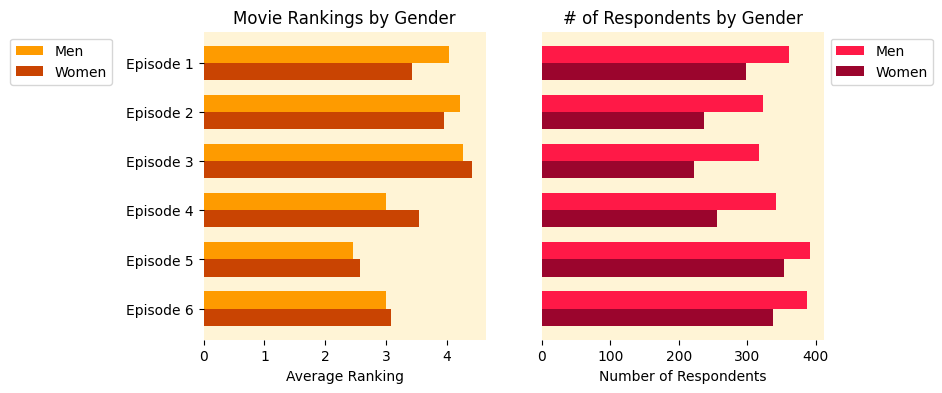

In [113]:
ind = np.arange(6)
height = 0.35
offset = ind + height

fig,ax = plt.subplots(1, 2, figsize=(8,4))
malebar = ax[0].barh(ind, male_ranking_avgs, color='#fe9b00', height=height)
femalebar = ax[0].barh(offset, female_ranking_avgs, color='#c94402', height=height)
ax[0].set_facecolor('#fff4d6')
ax[0].set_title('Movie Rankings by Gender')
ax[0].set_yticks(ind + height / 2)
ax[0].set_yticklabels(('Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5',
                   'Episode 6'))
ax[0].set_xlabel('Average Ranking')
ax[0].legend((malebar[0], femalebar[0]), ('Men', 'Women'),bbox_to_anchor=[-0.3,1])
ax[0].invert_yaxis()

male2bar = ax[1].barh(ind, male_tot_seen, color='#ff1947', height=height)
female2bar = ax[1].barh(offset, female_tot_seen, color='#9b052d', height=height)
ax[1].set_facecolor('#fff4d6')
ax[1].set_title('# of Respondents by Gender')
ax[1].set_yticks([])
ax[1].set_xlabel('Number of Respondents')

ax[1].legend((male2bar[0], female2bar[0]), ('Men', 'Women'),bbox_to_anchor=[1,1])
ax[1].invert_yaxis()

for a in ax:
    for spine in ['top', 'right', 'bottom', 'left']:
        a.spines[spine].set_visible(False)
plt.show()

Episode 5 was highest ranked among both men and women, but the ranking differences between the genders was negligible with a slight exception for Episode 4. Men tended to rank Episode 4 slightly higher than women. Overall more men have seen each of the 6 films than women survey respondents, with the two most popular movies among each gender being Episode 5 and 6.